# Exercise Sheet 3

## Machine learning basics

### Deadline: 02.12.2020 23:59

**Instructions:**
Insert your code in the *TODO* sections ans type your answers in the *Answer* cells. <br>

Names and teams IDs:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, log_loss
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

## 1 Implementing regression

In this exercise we will practice implementing regression on the Titanic dataset using the package *sklearn*. <br>
<a href="https://www.kaggle.com/c/titanic">Titanic dataset </a> contains the data about passengers of the ship and information whether they survived or not. <br>
In the materials for this exercise you can find the file *titanic.csv*. This file contains preprocessed data with information about passenger ID, age, class, and *price* of their ticket.

**1.1 Load the data as a pandas dataframe, using <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a> method**

In [4]:
# TODO: load the data into the varible 'titanic', have a look at the data
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Age,Price
0,1,0,3,22.0,7.2500
1,2,1,1,38.0,71.2833
2,3,1,3,26.0,7.9250
3,4,1,1,35.0,26.5500
4,5,0,3,35.0,8.0500


**Look at the data and report which variables are continuous, nominal, ordinal. (0.5 points)** 

*Answer:* 
- **continuous**: A continious data represents measurements and therefore their values can’t be counted but they can be measured. For eg. Weight. It can take on every value on some range like my weight can vary from 60 Kg to 60.0001 and we get a new data. Examples of continious data are- weight, area, time. While some examples of discreet data are- grades, # of numbers, money
- **nominal**: Nominal data is used for naming or labelling variables.
- **ordinal**:Ordinal data is a type of categorical data with an order. The variables in ordinal data are listed in an ordered manner. eg. # medals in Olympic by all countries.

Here we have-
- continious variable- **Price**
- nominal variables- **Pclass**, **Survived**
- ordinal variables- **PassengerId**

\\
- continious variable- **PassengerId**, **Age**, **Price**
- nominal variables- **Survived**
- ordinal variables- **Pclass**



**1.2 Here we will implement a simple linear regression and try to see if we can predict the *price* of the ticket based on the *age* of the passenger (0.5 points)** <br>
Consult the documentation on <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression class </a> in sklearn

In [72]:
# TODO:
# 1) create an instance of LinearRegression class
# 2) fit the model to predict Price of the ticket from Age of the passenger
#    (consult the METHODS section in the documentation)
# Hint: it might be the case that you will have to reshape your data using .reshape(-1, 1).
#    You can create separate numpy arrays containing only Age and Price and reshape them if needed.

lr = LinearRegression()
X = titanic["Age"].to_numpy().reshape(-1, 1) #Training data
y_true = titanic["Price"].to_numpy().reshape(-1, 1) #Target values
lr.fit(X, y_true) #  It returns self, which is the variable model itself
y_pred = lr.predict(X)



**What are the parameters of the model that we fit? Hint: the parametrs are the attributes of the model, consult the documentation.**

In [7]:
# TODO: Get the parameters of the model
print("Model parameters-")
print("Slope", lr.coef_)
print("Intercept", lr.intercept_)
# print(tuple(zip(X, y_pred))[:10])

Model parameters-
Slope [[0.33511181]]
Intercept [8.77641078]


**1.3 Write the formula of the fitted regression. (0.5 points)**

*Answer:* $$ 
y = \theta_0 +\theta_1 x \\
y = 8.77641078 +0.33511181 x
$$

**1.4 Let us see how good are the estimated values of the model. (0.5 points)** <br>
Write the formula for Mean Squared Error and calculate the value for our age~price model. <br>
Check if you calculated it correctly using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html"> mean_squared_error method </a> from sklearn.metrics

*Answer (MSE formula)*: $$
\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.
$$
Where $y$ : true values \
    $\hat{y}$: predicated values \
    $n_{samples}$: total number of samples in the training data 

In [8]:
# TODO:
# a) calculate mean squared error of our model
mse_np = np.sum(np.square(y_true - y_pred))/len(y_true)
print('Mean squared error using using formula: %.2f'%mse_np)

# b) check you answer using mean_squared_error method.
mse = mean_squared_error(y_true, y_pred)
print('Mean squared error using mean_squared_error method: %.2f'%mse)

Mean squared error using using formula: 433.04
Mean squared error using mean_squared_error method: 433.04


**1.5 Get predictions of your model (hint: there is a corresponding method) and plot them with the original data on the same graph. (1 point)** <br>


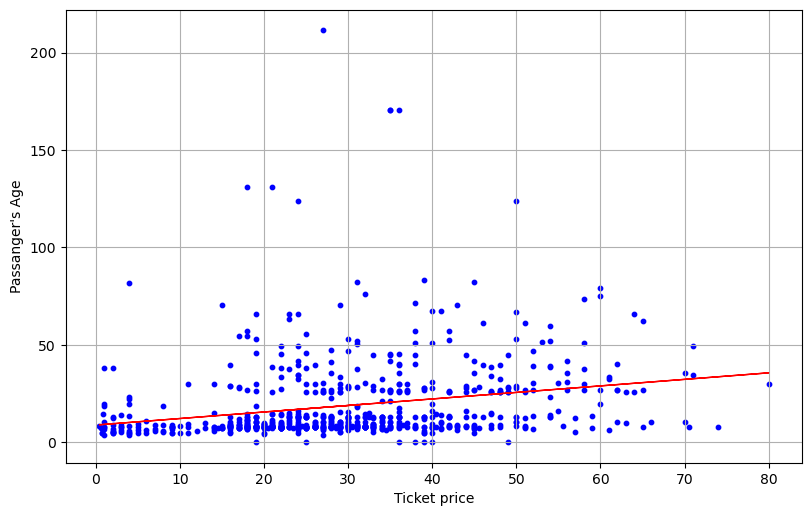

In [16]:
#TODO:
# Plot original data and predictions on the same graph
plt.figure(num=None, figsize=(9.5, 6), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(X, y_true,  color='blue', s=10)
plt.plot(X, y_pred, color='red', linewidth=1)
plt.xlabel('Ticket price')
plt.ylabel('Passanger\'s Age')
plt.grid()
plt.show()

Is Age a good predictor for the Price of the ticket? Have a look at the data again. Is there a better predictor? <br>
**1.6 Choose another predictor and repeat the same steps (1.2-1.5). Report the better predictor. (0.5 points)**

Model parameters-
Slope [[-17.06934444]]
Intercept [56.90784762]
Mean squared error using using formula: 252.32
Mean squared error using mean_squared_error method: 252.32


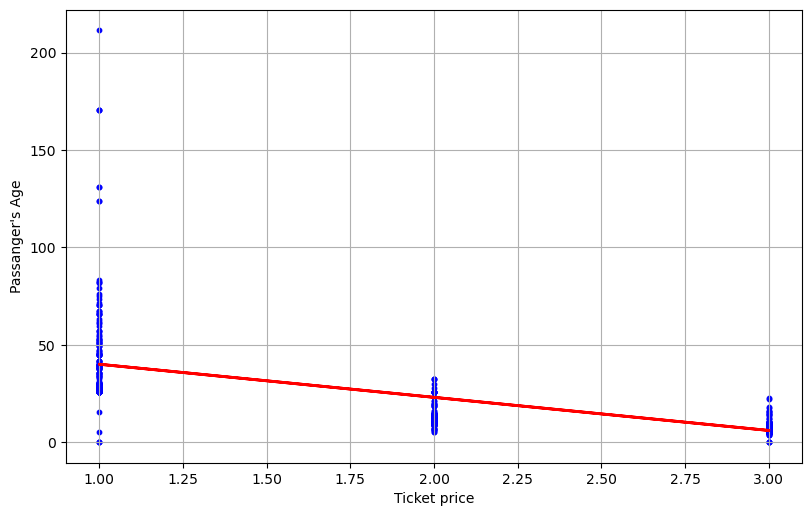

In [73]:
# TODO: Choose another predictor and repeat the same steps
lr = LinearRegression()
X = titanic["Pclass"].to_numpy().reshape(-1, 1) #Training data
lr.fit(X, y_true) #  It returns self, which is the variable model itself
y_pred = np.round(lr.predict(X))

print("Model parameters-")
print("Slope", lr.coef_)
print("Intercept", lr.intercept_)

# a) calculate mean squared error of our model
mse_np = np.sum(np.square(y_true - y_pred))/len(y_true)
print('Mean squared error using using formula: %.2f'%mse_np)

# b) check you answer using mean_squared_error method.
mse = mean_squared_error(y_true, y_pred)
print('Mean squared error using mean_squared_error method: %.2f'%mse)

plt.figure(num=None, figsize=(9.5, 6), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(X, y_true,  color='blue', s=10)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.rcParams['figure.figsize'] = [9.5, 6]
plt.xlabel('Ticket price')
plt.ylabel('Passanger\'s Age')
plt.grid()
plt.show()
# Write why Pclass is a better prediction

**Pclass** is a better predictor for the price of the ticket.

We can go on and try to improve the fit even more by increasing the complexity of the model.<br>
**1.7 Consult this <a href="https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/">Tutorial</a> and fit polynomial regressions using the better predictor. (1.5 points)**<br>
1) Fit regressions of order 2, 5, and 10. <br>
2) Get parameters of the models and write down the equations for each model inserting the fitted parameters. <br>
3) Compute MSE for each model and compare them. Does increasing the capacity of the model improve its performance? <br>

In [106]:
# TODO: Perform steps 1-3.

# Fit regression
X = titanic["Age"].to_numpy().reshape(-1, 1) #Training data

def poly_reg(deg, X, y_true):

    Input = [('poly',PolynomialFeatures(degree=deg)),('lr',LinearRegression())]
    pipe = Pipeline(Input)
    pipe.fit(X,y_true)
    mse = mean_squared_error(y_true, pipe.predict(X))
    
#     print("params", pipe.named_steps.lr.coef_)
    print("Poly reg order: %d"%deg)
    reg_label = "Inliers coef:%s - b:%f" % (np.array2string(pipe.named_steps.lr.coef_, formatter={'float_kind': lambda fk: "%f" % fk}),pipe.named_steps.lr.intercept_)
    
#     print("Intercept", pipe.named_steps.lr.intercept_)
    print(reg_label)
    print('MSE: %.2f\n'%mse)
    

poly_reg(2, X, y_true)
poly_reg(5, X, y_true)
poly_reg(10, X, y_true)



Poly reg order: 2
Inliers coef:[[0.000000 0.317616 0.000269]] - b:9.002042
MSE: 433.03

Poly reg order: 5
Inliers coef:[[0.000000 -0.055637 0.023696 -0.000760 0.000013 -0.000000]] - b:10.954539
MSE: 432.11

Poly reg order: 10
Inliers coef:[[0.000000 0.000001 0.000003 0.000034 0.000208 -0.000020 0.000001
  -0.000000 0.000000 -0.000000 0.000000]] - b:10.979092
MSE: 431.48



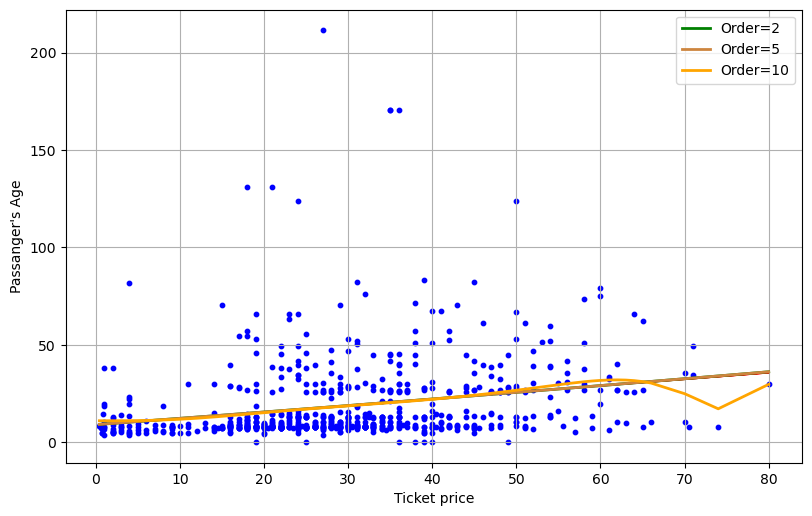

In [107]:
## Extra 
# y_poly_pred = pipe_deg2.predict(X) # Predicted ouput- ticket price

sorted_zip = sorted(zip(X,pipe_deg2.predict(X)))
X2_poly, y2_poly_pred = zip(*sorted_zip)

sorted_zip = sorted(zip(X,pipe_deg2.predict(X)))
X5_poly, y5_poly_pred = zip(*sorted_zip)

sorted_zip = sorted(zip(X,pipe_deg10.predict(X)))
X10_poly, y10_poly_pred = zip(*sorted_zip)


plt.figure(num=None, figsize=(9.5, 6), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(X, y_true,  color='blue', s=10)
plt.plot(X, y_pred, color='red', linewidth=1)
plt.plot(X2_poly, y2_poly_pred, color='green', linewidth=2, label="Order=2")
plt.plot(X5_poly, y5_poly_pred, color='peru', linewidth=2, label="Order=5")
plt.plot(X10_poly, y10_poly_pred, color='orange', linewidth=2, label="Order=10")
plt.xlabel('Ticket price')
plt.ylabel('Passanger\'s Age')
plt.legend()
plt.grid()
plt.show()



Now we will try to predict if a passenger survived based on the passenger class. <br>
Whether a passenger survived or not is a categorical variable, so we have to implement a **logistic** regression. <br>
Logistic regression will be covered in the lecture on the 1st of December, but you can already get acquainted with it in <a href = "https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc">this post</a>.

**1.8 Fit a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> logistic regression </a> predicting if a passenger has survived based on their class. (0.5 points)** <br>



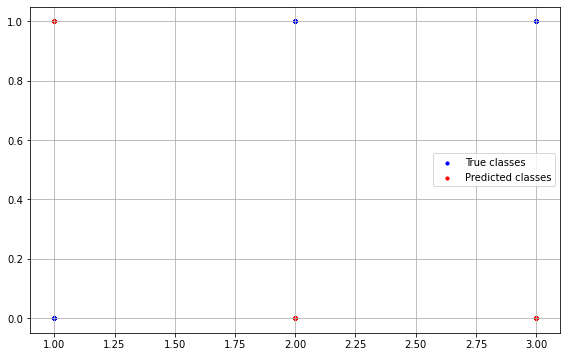

In [67]:
# TODO: fit a logistic regression (Pclass predicts Survived)
X = titanic["Pclass"].to_numpy().reshape(-1, 1) #Training data
y_true = titanic["Survived"] #Target values

logisticRegr = LogisticRegression()
logisticRegr.fit(X, y_true.values.ravel())

y_pred = np.round(logisticRegr.predict(X)).reshape(-1, 1)
y_pred

plt.scatter(X, y_true.values.ravel(),  color='blue', s=10, label="True classes")
plt.scatter(X, y_pred, color='red', s=10, label="Predicted classes")
plt.rcParams['figure.figsize'] = [9.5, 6]
# plt.xlabel('Ticket price')
# plt.ylabel('Passanger\'s Age')
plt.legend()
plt.grid()
plt.show()

In [71]:
# print(X.shape, y_true.shape, y_pred.shape)
# print(y_true.values.ravel()[:10],y_pred[:10])
y_true[:100]

0     0
1     1
2     1
3     1
4     0
     ..
95    0
96    0
97    1
98    0
99    1
Name: Survived, Length: 100, dtype: int64

**1.9 Cross entropy loss. (1 point)** <br>
The measure that we use for estimating the error of a logistic regression is *Cross Entropy Loss*. <br>
Here is a good <a href="https://www.youtube.com/watch?v=jKQI75qKm3A"> video </a> explaining Maximum Likelihood Estimation and Cross Entropy Loss. <br>
Write the formula for Cross Entropy Loss and calculate the error of your model using this formula. Check your answer using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html"> log_loss </a> method from sklearn.

*Cross Entropy Loss formula*:

In [11]:
# TODO: compute Cross Entropy Loss and check it using log_loss method.



**1.10 Fit a multiple logistic regression (0.5 points)** <br>
Now let's check if the Age of a passenger also had an influence on their survival chances. <br>
Fit a model with 2 predictors, compute the loss. Compare with the previous model.

In [12]:
# TODO: fit a multiple regression with Age and Pclass as predictors of survival.
#       Hint: the predictors should be in shape of a 2d array, Age and Pclass as columns.



## 2 Evaluating the performance of a model

**2.1 Give definitions of terms overfitting and underfitting. <br>
How can we check if the model underfits, overfits or is optimal? (1 point)**

*Answer*:

**2.2 Evaluation metrics (2 points)**<br>
Watch this <a href="https://www.youtube.com/watch?v=wpQiEHYkBys">video about evaluation metrics</a>. <br>
Discuss the differences between Accuracy, Precision, Recall, F1, MCC (Mathews Correlation Coeffcient): <br>
1. How are they calculated? <br>
2. In which case can a model get the perfect score? <br>
3. Give examples of situations when you would prefer one over the others. <br>
4. Getting back to our Titanic case: Imagine that you have to predict if the passenger survived or not and pass this information to the families. Which metric would you use? Why?

*Answer:*
    